In [2]:
import json
import numpy as np
import pandas as pd

In [3]:
path = "2023_05_25_20:50:34/result_0.json"

with open('../EvolutionaryFramework/results/MOEA_D/' + path) as user_file:
  parsed_json = json.load(user_file)
  
# print(json.dumps(parsed_json, indent = 4, sort_keys=True))

In [4]:
data = []
metaParameters = []
for elem in parsed_json:
    if elem == "metaParameters":
        metaParameters.append({
            'algorithmName': parsed_json[elem]["algorithmName"],
            'populationSize': parsed_json[elem]["populationSize"],
            'numberOfBars': parsed_json[elem]["numberOfBars"],
            'maxNumberOfNotes': parsed_json[elem]["maxNumberOfNotes"],
            'representationType': parsed_json[elem]["representationType"],
            'melodyKeyValue': parsed_json[elem]["melodyKeyValue"],
            'melodyKeyType': parsed_json[elem]["melodyKeyType"],
            'crossoverType': parsed_json[elem]["crossoverType"],
            'mutationType': parsed_json[elem]["mutationType"],
            'mutationProbability': parsed_json[elem]["mutationProbability"],
            'selectionType': parsed_json[elem]["selectionType"],
            'matingPoolSelectionType': parsed_json[elem]["matingPoolSelectionType"],
            'numberOfGenerations': parsed_json[elem]["numberOfGenerations"],
            'criteria': parsed_json[elem]["criteria"],
            'numberOfNeighbours': parsed_json[elem]["numberOfNeighbours"]
        })
metaParameters_df = pd.DataFrame(metaParameters)   


for elem in parsed_json:
        if elem == "experiment":
            for generation in parsed_json[elem]:
                for individual in parsed_json[elem][generation]:
                    dictionary = {}
                    dictionary = {
                        'generation': generation,
                        'melody': individual['melody'],
                    }
                    for criterion in metaParameters_df['criteria'].values[0]:
                        dictionary[criterion] = individual['fitness'][criterion]
                    data.append(dictionary)
data_df = pd.DataFrame(data)

In [5]:
data_df.head()

,generation,melody,STABILITY,TENSION
0,generation_11,73/0.125 73/0.1875 68/0.125 79/0.125 59/0.125 ...,0.596534,0.695087
1,generation_11,71/0.4375 R/0.125 61/0.125 68/0.0625 71/0.1875...,0.629821,0.572040
2,generation_11,73/0.125 73/0.25 62/0.1875 59/0.125 71/0.25 R/...,0.621074,0.608719
3,generation_11,63/0.0625 61/0.25 59/0.125 61/0.125 53/0.0625 ...,0.535790,0.740616
4,generation_11,73/0.125 73/0.1875 68/0.125 79/0.125 59/0.125 ...,0.582595,0.717041


In [6]:
metaParameters_df.head()

,algorithmName,populationSize,numberOfBars,maxNumberOfNotes,representationType,melodyKeyValue,melodyKeyType,crossoverType,mutationType,mutationProbability,selectionType,matingPoolSelectionType,numberOfGenerations,criteria,numberOfNeighbours
0,MOEA/D,1000,4,16,f1,A,MAJOR,TWO_POINT_CROSSOVER,BAR_ORDER_AND_SIMPLE,1.0,,,200,"[STABILITY, TENSION]",10


In [7]:
data_df.head()

,generation,melody,STABILITY,TENSION
0,generation_11,73/0.125 73/0.1875 68/0.125 79/0.125 59/0.125 ...,0.596534,0.695087
1,generation_11,71/0.4375 R/0.125 61/0.125 68/0.0625 71/0.1875...,0.629821,0.572040
2,generation_11,73/0.125 73/0.25 62/0.1875 59/0.125 71/0.25 R/...,0.621074,0.608719
3,generation_11,63/0.0625 61/0.25 59/0.125 61/0.125 53/0.0625 ...,0.535790,0.740616
4,generation_11,73/0.125 73/0.1875 68/0.125 79/0.125 59/0.125 ...,0.582595,0.717041


In [8]:
data_df.loc[0]

generation                                        generation_11
melody        73/0.125 73/0.1875 68/0.125 79/0.125 59/0.125 ...
STABILITY                                              0.596534
TENSION                                                0.695087
Name: 0, dtype: object

In [9]:
generation = data_df[data_df["generation"] == "generation_200"]

In [10]:
list_of_fronts = []
for criterion in metaParameters_df['criteria'].values[0]:
    criterion_individuals = []
    for individual in generation[criterion]:
        criterion_individuals.append(individual)
    list_of_fronts.append(criterion_individuals)


In [11]:
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

24


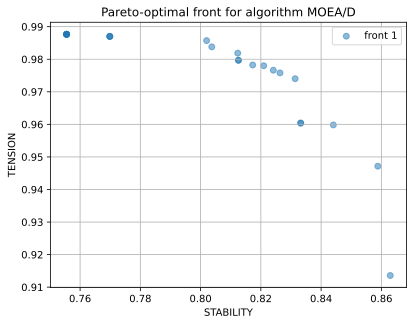

In [12]:
fig, ax = plt.subplots()
ax.set_title("Pareto-optimal front for algorithm MOEA/D")
for i, criterion in enumerate(metaParameters_df['criteria'].values[0]):
    if i == 0:
        ax.set_xlabel(criterion)
    else:
        ax.set_ylabel(criterion)
ax.grid()


ax.scatter(list_of_fronts[0], list_of_fronts[1], label = f"front 1", alpha=0.5)
print(len(list_of_fronts[0]))

plt.legend()
plt.show()


In [13]:
from natsort import index_natsorted
list_of_generations = []
data_df = data_df.sort_values(by=['generation'], key = lambda x: np.argsort(index_natsorted(data_df["generation"])))
for generation_name in data_df["generation"].unique():
    list_of_fronts = []
    generation = data_df[data_df["generation"] == generation_name]
    print(generation_name)
    for criterion in metaParameters_df['criteria'].values[0]:
        criterion_individuals = []
        for individual in generation[criterion]:
            criterion_individuals.append(individual)
        list_of_fronts.append(criterion_individuals)
    list_of_generations.append(list_of_fronts)

average_generations = np.zeros((len(list_of_generations), len(metaParameters_df['criteria'].values[0])))

for idx, elem in enumerate(list_of_generations):
    temp = np.zeros(len(metaParameters_df['criteria'].values[0]))
    for i, criterion in enumerate(elem):
        temp[i] = np.average(criterion) 
    average_generations[idx] = temp 

print(average_generations)



generation_1
generation_3
generation_5
generation_7
generation_9
generation_11
generation_13
generation_15
generation_17
generation_19
generation_21
generation_23
generation_25
generation_27
generation_29
generation_31
generation_33
generation_35
generation_37
generation_39
generation_41
generation_43
generation_45
generation_47
generation_49
generation_51
generation_53
generation_55
generation_57
generation_59
generation_61
generation_63
generation_65
generation_67
generation_69
generation_71
generation_73
generation_75
generation_77
generation_79
generation_81
generation_83
generation_85
generation_87
generation_89
generation_91
generation_93
generation_95
generation_97
generation_99
generation_101
generation_103
generation_105
generation_107
generation_109
generation_111
generation_113
generation_115
generation_117
generation_119
generation_121
generation_123
generation_125
generation_127
generation_129
generation_131
generation_133
generation_135
generation_137
generation_139
gener

/var/folders/xt/9n_zwlsd12d73nqvy46sv7dm0000gn/T/ipykernel_31623/772001616.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(X, rotation=90)


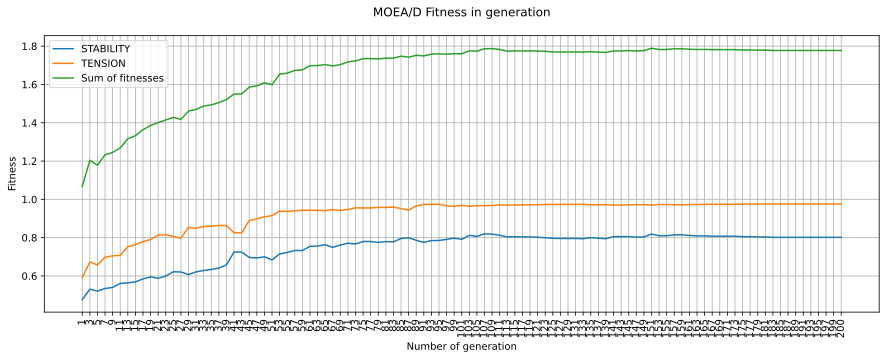

In [14]:
X = data_df["generation"].unique()
for i, elem in enumerate(X):
    X[i] = elem[11:]


fig, ax = plt.subplots(figsize=(15,5))
# ax.set_title("MOEA/D Fitness in generation\n" + path)
ax.set_title("MOEA/D Fitness in generation\n")
for i, criterion in enumerate(metaParameters_df['criteria'].values[0]):  
    ax.plot(X, average_generations[:,i], label=criterion)
        
ax.plot(X, average_generations[:,0] + average_generations[:,1], label="Sum of fitnesses")

ax.set_xticklabels(X, rotation=90)
ax.set_xlabel("Number of generation")
ax.set_ylabel("Fitness")

ax.grid()

plt.legend()
plt.show()